# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=25)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=25)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

19

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create lists to hold values
City_ID = []
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []


In [4]:
# Declare the url
url = "http://api.openweathermap.org/data/2.5/weather?"

print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through the cities
for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    city_weather = requests.get(query_url).json()
    
    try: 
        City.append(city_weather['name'])
        Cloudiness.append(city_weather['clouds']['all'])
        Country.append(city_weather['sys']['country'])
        Date.append(city_weather['dt'])
        Humidity.append(city_weather['main']['humidity'])
        Lat.append(city_weather['coord']['lat'])
        Lng.append(city_weather['coord']['lon'])
        Max_Temp.append(city_weather['main']['temp_max'])
        Wind_Speed.append(city_weather['wind']['speed'])
        City_ID.append({cities.index(city)})
        print(f'Processing: {cities.index(city)} | {city}')
    except:
        print(f"We could not find {city}")
        pass

print(f"------------------------")    
print(f"Data Retrieval Complete")
print(f"------------------------")

Beginning Data Retrieval
------------------------
Processing: 0 | hermanus
Processing: 1 | trapani
Processing: 2 | vzmorye
Processing: 3 | mataura
Processing: 4 | cape town
Processing: 5 | tuktoyaktuk
Processing: 6 | pisco
Processing: 7 | nome
Processing: 8 | husavik
Processing: 9 | daneti
Processing: 10 | busselton
Processing: 11 | luderitz
Processing: 12 | hilo
Processing: 13 | chokurdakh
Processing: 14 | punta arenas
Processing: 15 | severo-kurilsk
Processing: 16 | tongling
Processing: 17 | ritchie
Processing: 18 | puerto ayora
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame to store the values from the API calls
city_data_df = pd.DataFrame({
    "City ID": City_ID,
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date})

city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")


city_data_df

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Hermanus,-34.4187,19.2345,68.00,89,80,1.99,ZA,2021-02-06 23:51:24
1,{1},Province of Trapani,37.8333,12.6667,66.00,77,0,21.85,IT,2021-02-06 23:56:31
2,{2},Vzmorye,54.6961,20.2361,-0.40,85,0,2.24,RU,2021-02-06 23:56:31
3,{3},Mataura,-46.1927,168.8643,77.25,50,0,2.44,NZ,2021-02-06 23:47:09
4,{4},Cape Town,-33.9258,18.4232,71.01,78,20,10.36,ZA,2021-02-06 23:52:44
5,{5},Tuktoyaktuk,69.4541,-133.0374,-16.60,76,90,24.16,CA,2021-02-06 23:55:42
6,{6},Pisco,-13.7000,-76.2167,73.40,78,75,4.61,PE,2021-02-06 23:56:24
7,{7},Nome,64.5011,-165.4064,17.60,79,90,6.91,US,2021-02-06 23:54:46
8,{8},Husavik,66.0449,-17.3389,33.80,69,90,2.30,IS,2021-02-06 23:56:31
9,{9},Dăneţi,43.9833,24.0500,39.99,100,90,12.66,RO,2021-02-06 23:56:31


In [6]:
# Write the data to a csv
city_data_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(city_data_df.loc[city_data_df["Humidity"] > 100].index, inplace=False)

clean_city_data.head()

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Hermanus,-34.4187,19.2345,68.00,89,80,1.99,ZA,2021-02-06 23:51:24
1,{1},Province of Trapani,37.8333,12.6667,66.00,77,0,21.85,IT,2021-02-06 23:56:31
2,{2},Vzmorye,54.6961,20.2361,-0.40,85,0,2.24,RU,2021-02-06 23:56:31
3,{3},Mataura,-46.1927,168.8643,77.25,50,0,2.44,NZ,2021-02-06 23:47:09
4,{4},Cape Town,-33.9258,18.4232,71.01,78,20,10.36,ZA,2021-02-06 23:52:44


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

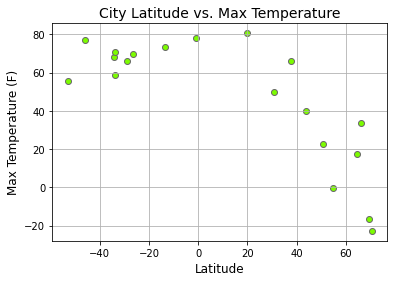

In [9]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="lawngreen", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Max Temperature", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-temp.png")
plt.show()


## Latitude vs. Humidity Plot

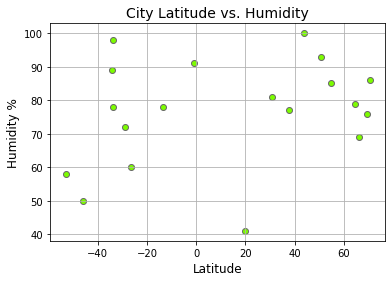

In [10]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="lawngreen", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.ylabel("Humidity %", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

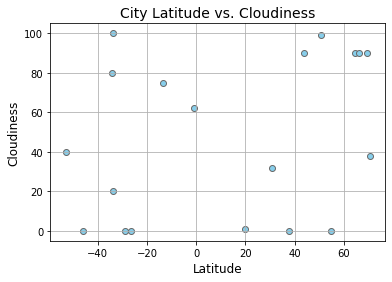

In [11]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Cloudiness", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

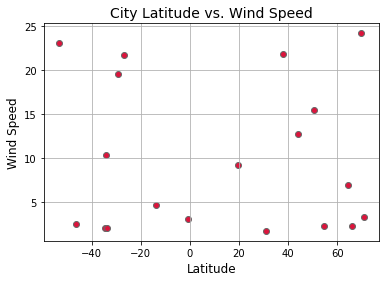

In [12]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="crimson", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Wind Speed", fontsize=14)
plt.ylabel("Wind Speed", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-windspeed.png")
plt.show()


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression